# Data Discovery

In this part, we do a short data exploration to see what dataset we have and whether we can find any patterns in it.

Also, we'll discover that some data transformations are needed to prepare the dataset for our modelling. A very important section of data discovery phase is to make sure that train and test sets are taken from the same distribution. This is a required step if we want to use cross-validation on the training set and be sure that our models' generalizations will work the same way on test.

Unfortunately, this knowledge will be mostly useless for this Capstone since we're not going to use unlabeled test set. Though, I still include this part of research in this Capstone due to its importance.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.cross_validation import cross_val_score

from scipy import stats
import seaborn as sns
from copy import deepcopy

%matplotlib inline

# This may raise an exception in earlier versions of Jupyter
%config InlineBackend.figure_format = 'retina'

In [98]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [99]:
train.shape

(188318, 132)

In [100]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [101]:
print(list(train.columns[:]))

['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', '

In [102]:
pd.isnull(train).values.any()

False

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [104]:
cat_features = list(train.select_dtypes(include=['object']).columns)
cont_features = [cont for cont in list(train.select_dtypes(include=
        ['float64', 'int64']).columns) if cont not in ['loss', 'id']]
id_col = list(train.select_dtypes(include=['int64']).columns)

In [105]:
print("there are {} categorical features".format(len(cat_features)))
print("there are {} continuous features".format(len(cont_features)))
print("the int64 column is: {}".format(id_col))

there are 116 categorical features
there are 14 continuous features
the int64 column is: ['id']


# check the uniq_values in categorical features

In [106]:
# find out the unique values of cat_features

cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(train[cat].unique()))

uniq_cat_values = pd.DataFrame.from_items([('cat_name', cat_features), ('uniq_values', cat_uniques)])
uniq_cat_values.head()

/Users/macssd/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,cat_name,uniq_values
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2


Text(7,71,'Binary features')

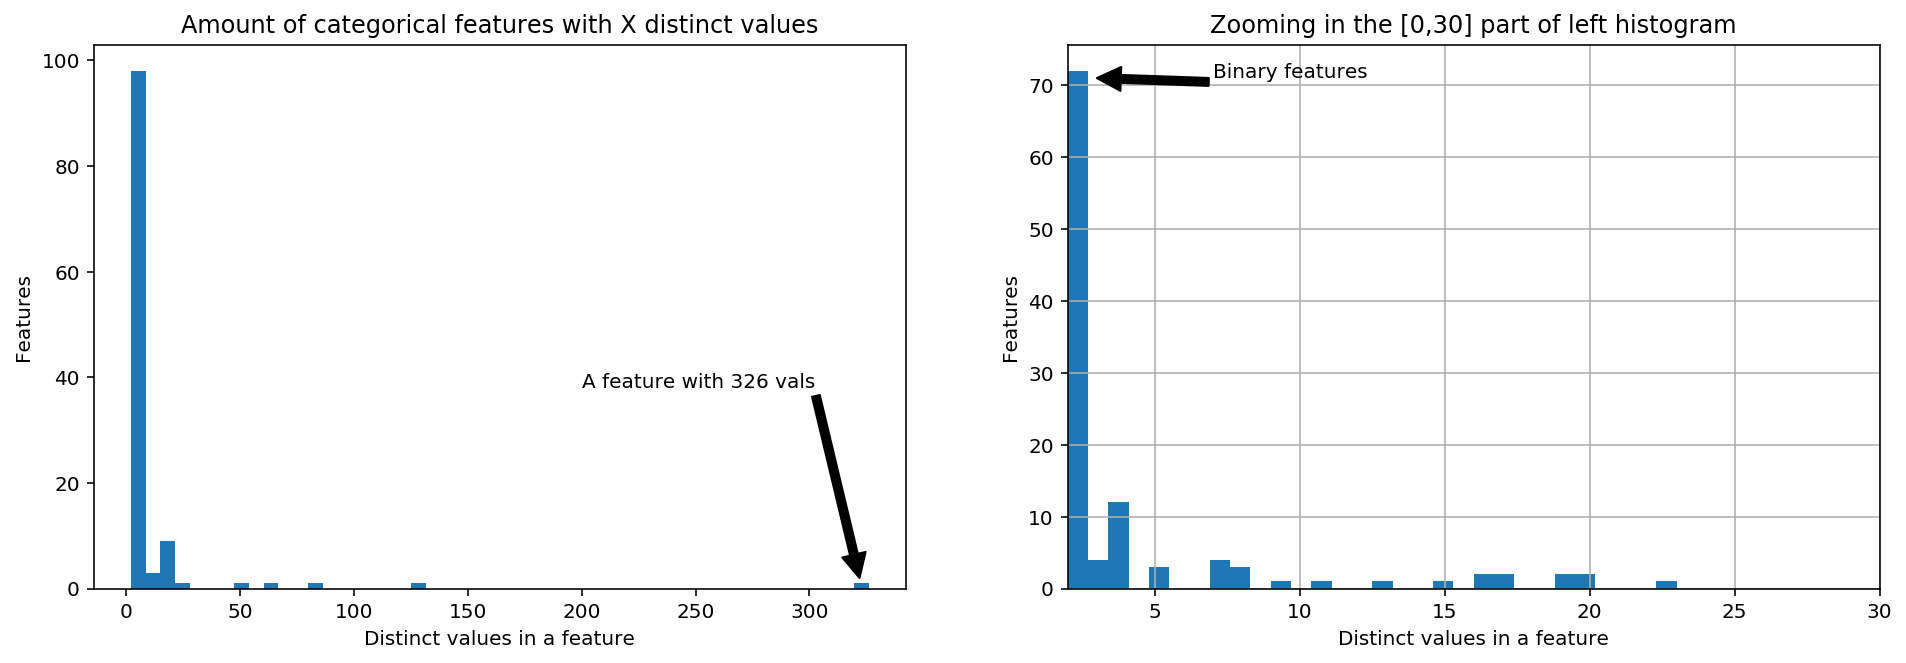

In [107]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(uniq_cat_values.uniq_values, bins=50)
ax1.set_title('Amount of categorical features with X distinct values')
ax1.set_xlabel('Distinct values in a feature')
ax1.set_ylabel('Features')
ax1.annotate('A feature with 326 vals', xy=(322, 2), xytext=(200, 38), arrowprops=dict(facecolor='black'))

ax2.set_xlim(2,30)
ax2.set_title('Zooming in the [0,30] part of left histogram')
ax2.set_xlabel('Distinct values in a feature')
ax2.set_ylabel('Features')
ax2.grid(True)
ax2.hist(uniq_cat_values[uniq_cat_values.uniq_values <= 30].uniq_values, bins=30)
ax2.annotate('Binary features', xy=(3, 71), xytext=(7, 71), arrowprops=dict(facecolor='black'))

In [108]:
uniq_values = uniq_cat_values.groupby("uniq_values").count()
uniq_values = uniq_values.rename(columns={'cat_name':'categories'})
uniq_values.sort_values(by='categories', inplace=True, ascending=False)
uniq_values.reset_index(inplace=True)
print(uniq_values)

    uniq_values  categories
0             2          72
1             4          12
2             3           4
3             7           4
4             5           3
5             8           3
6            20           2
7            19           2
8            17           2
9            16           2
10           15           1
11           13           1
12           11           1
13            9           1
14           23           1
15           51           1
16           61           1
17           84           1
18          131           1
19          326           1


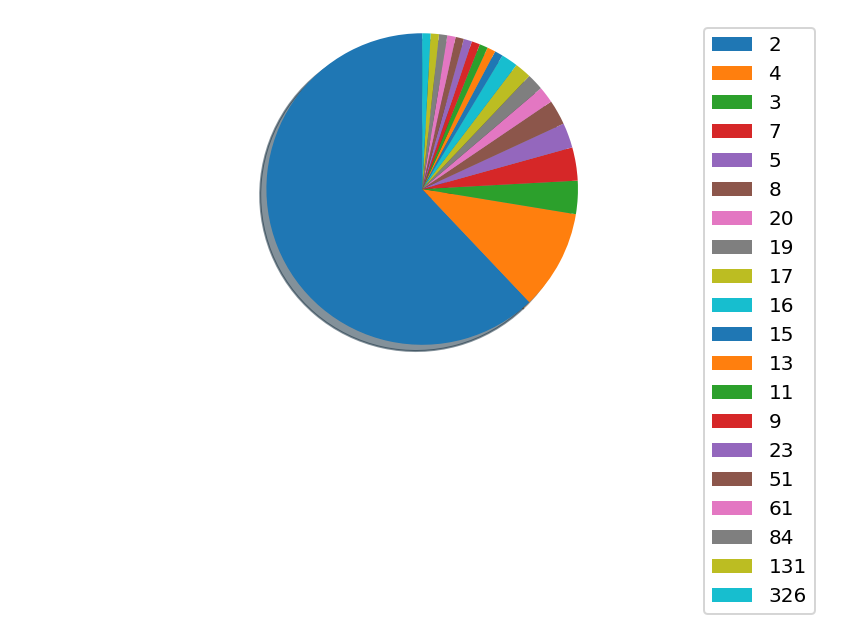

In [109]:
# pie chart

labels, sizes = uniq_values['uniq_values'], uniq_values['categories']
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

# continuous features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d072550>,
      dtype=object)

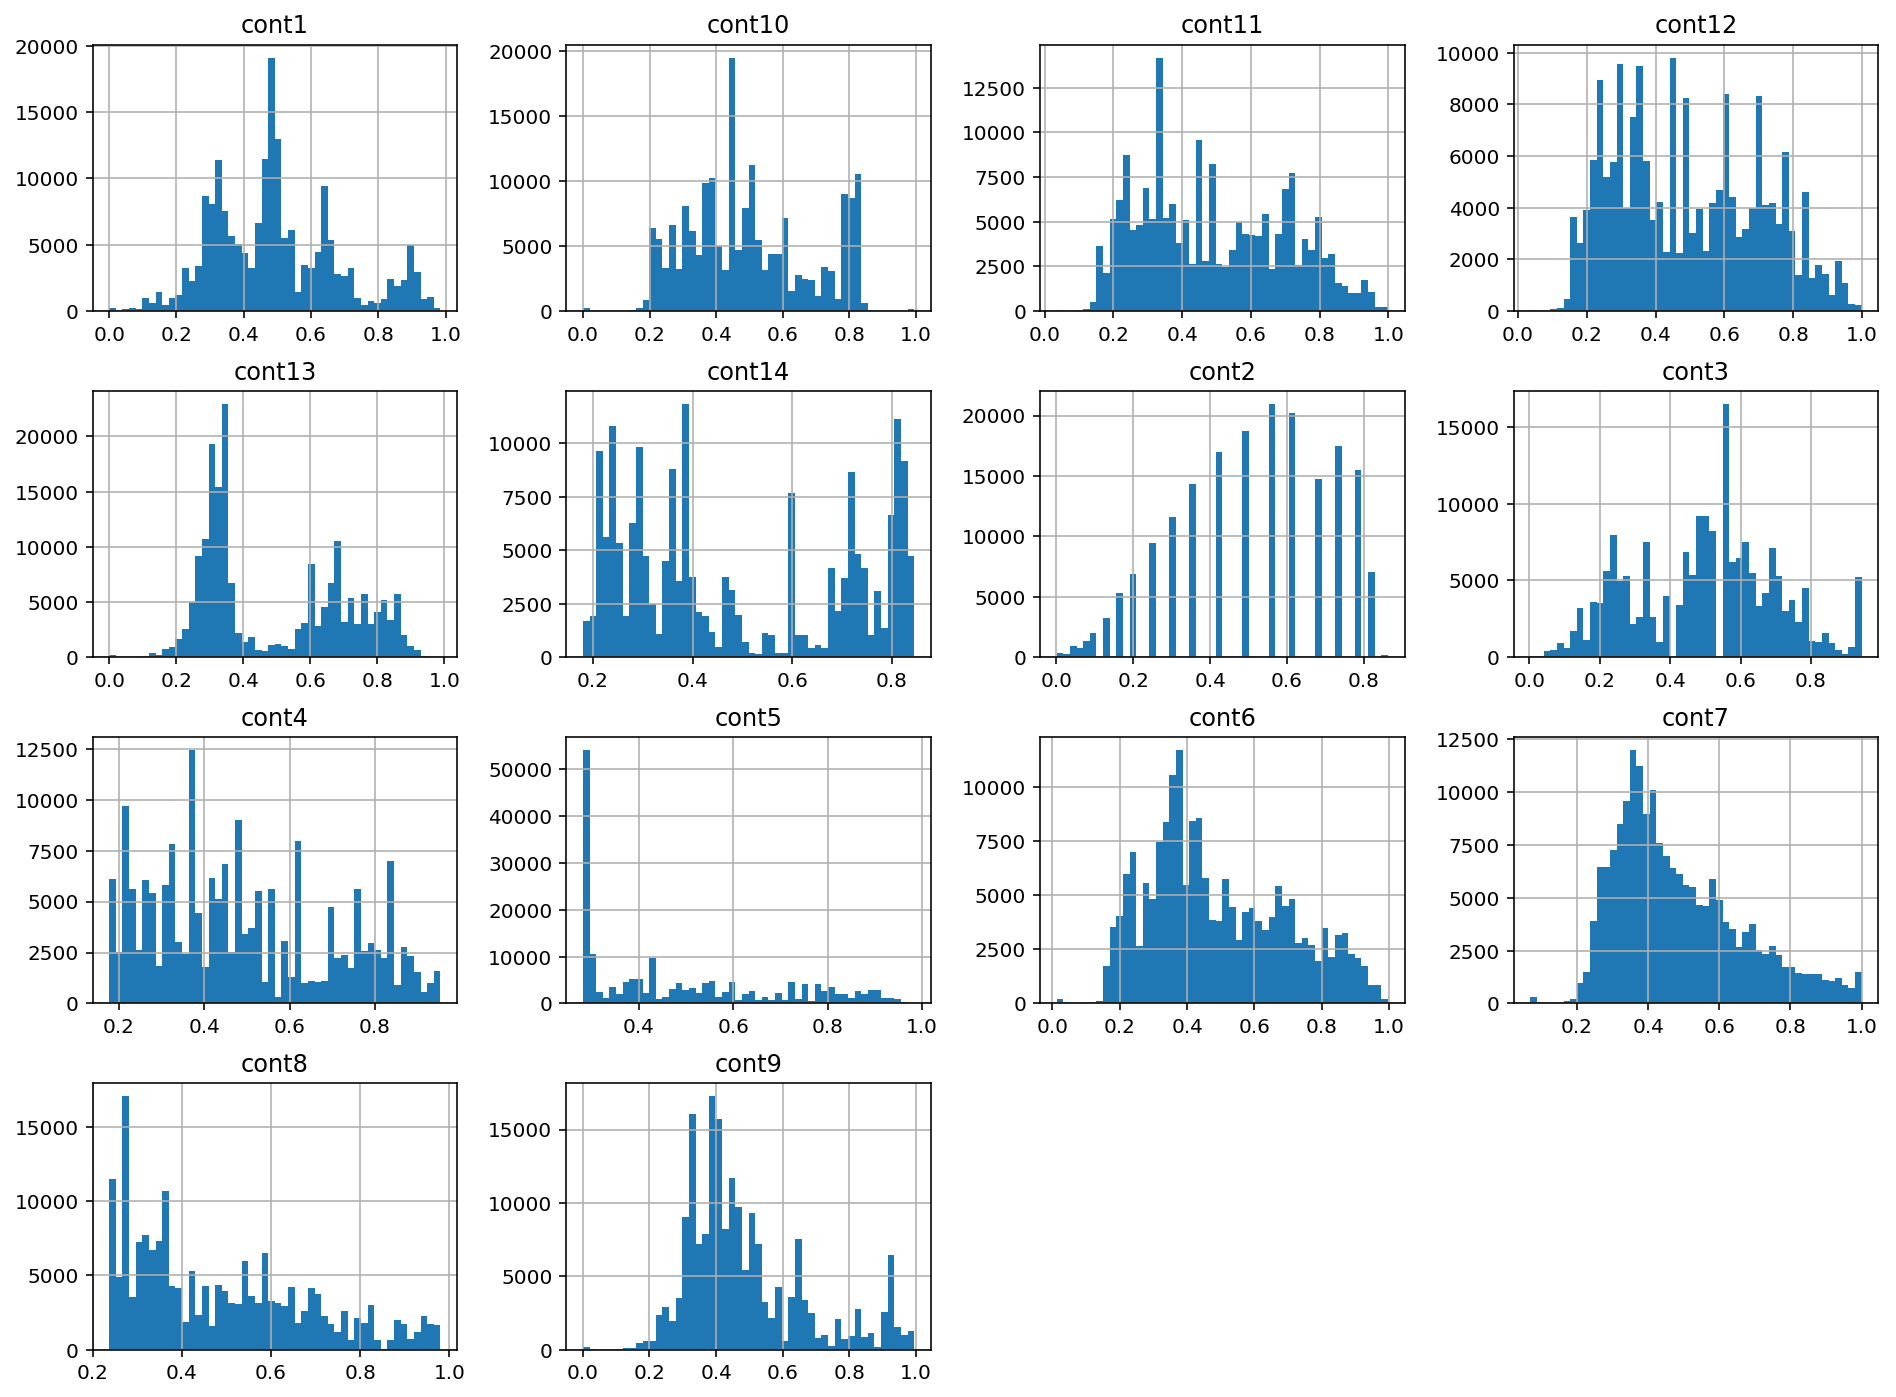

In [110]:
train[cont_features].hist(bins=50, figsize=(16,12))

# feature correlation - Pearson

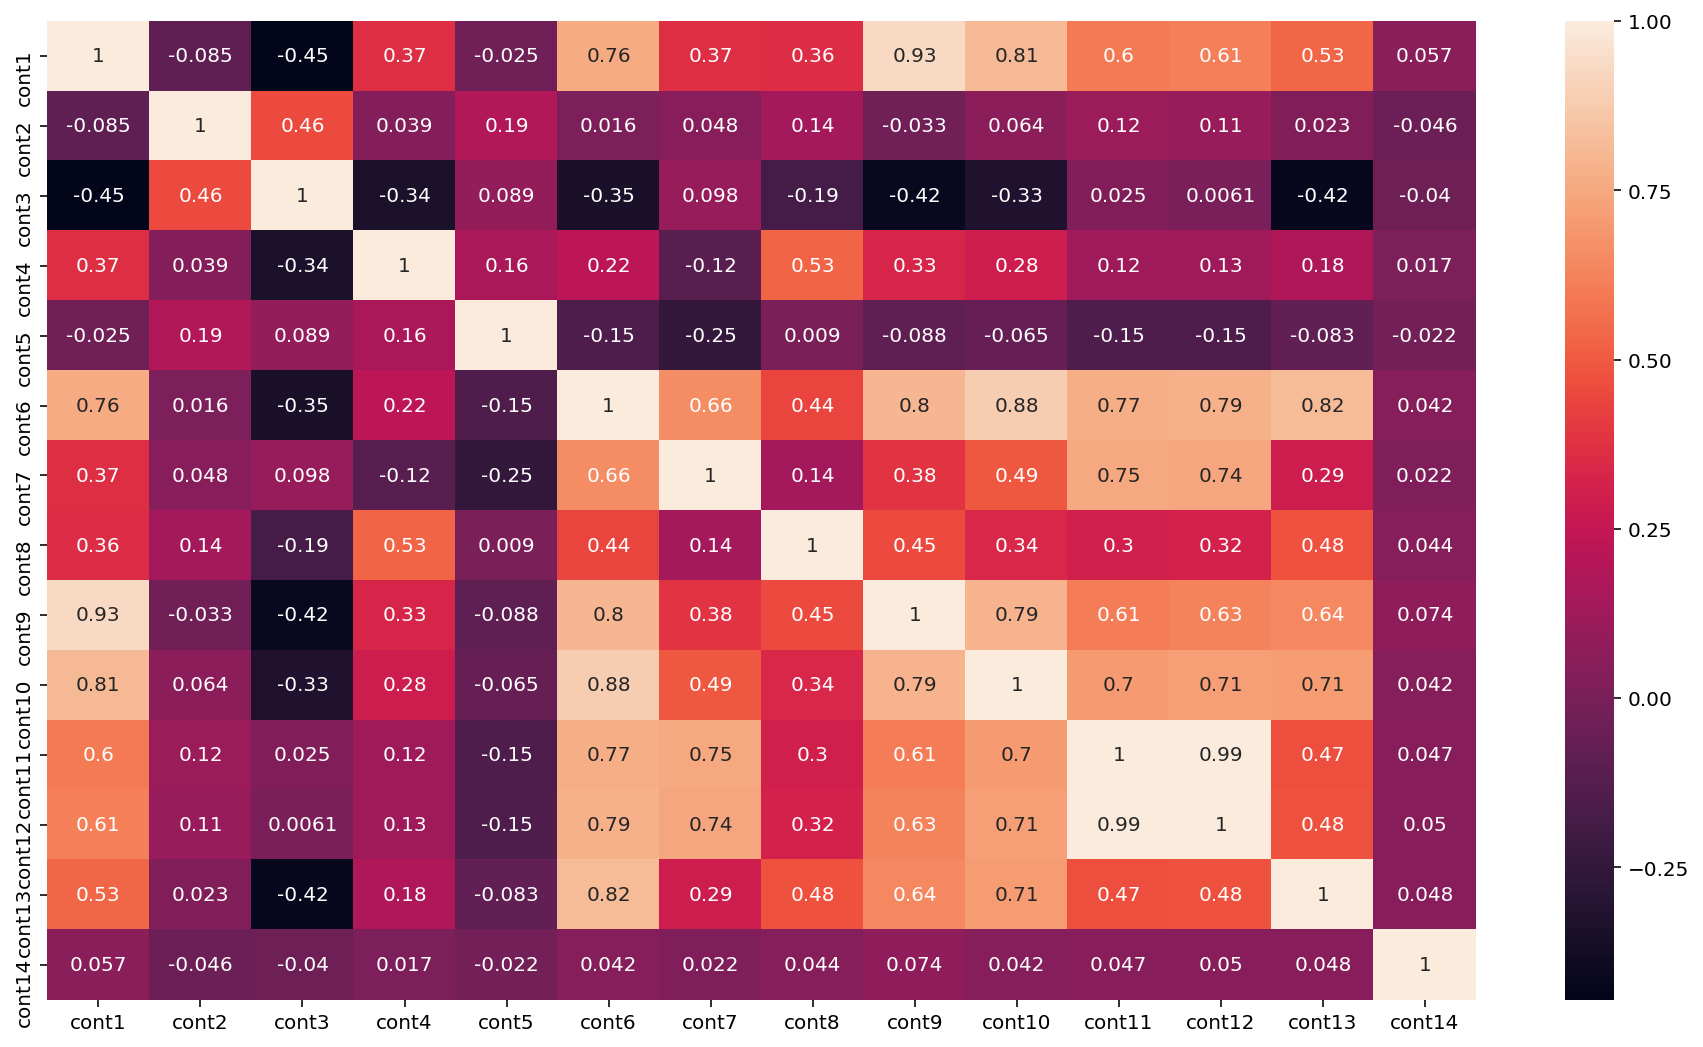

In [111]:
import seaborn as sns

plt.subplots(figsize=(16,9))
correlation_mat = train[cont_features].corr()
sns.heatmap(correlation_mat, annot=True)

# target features

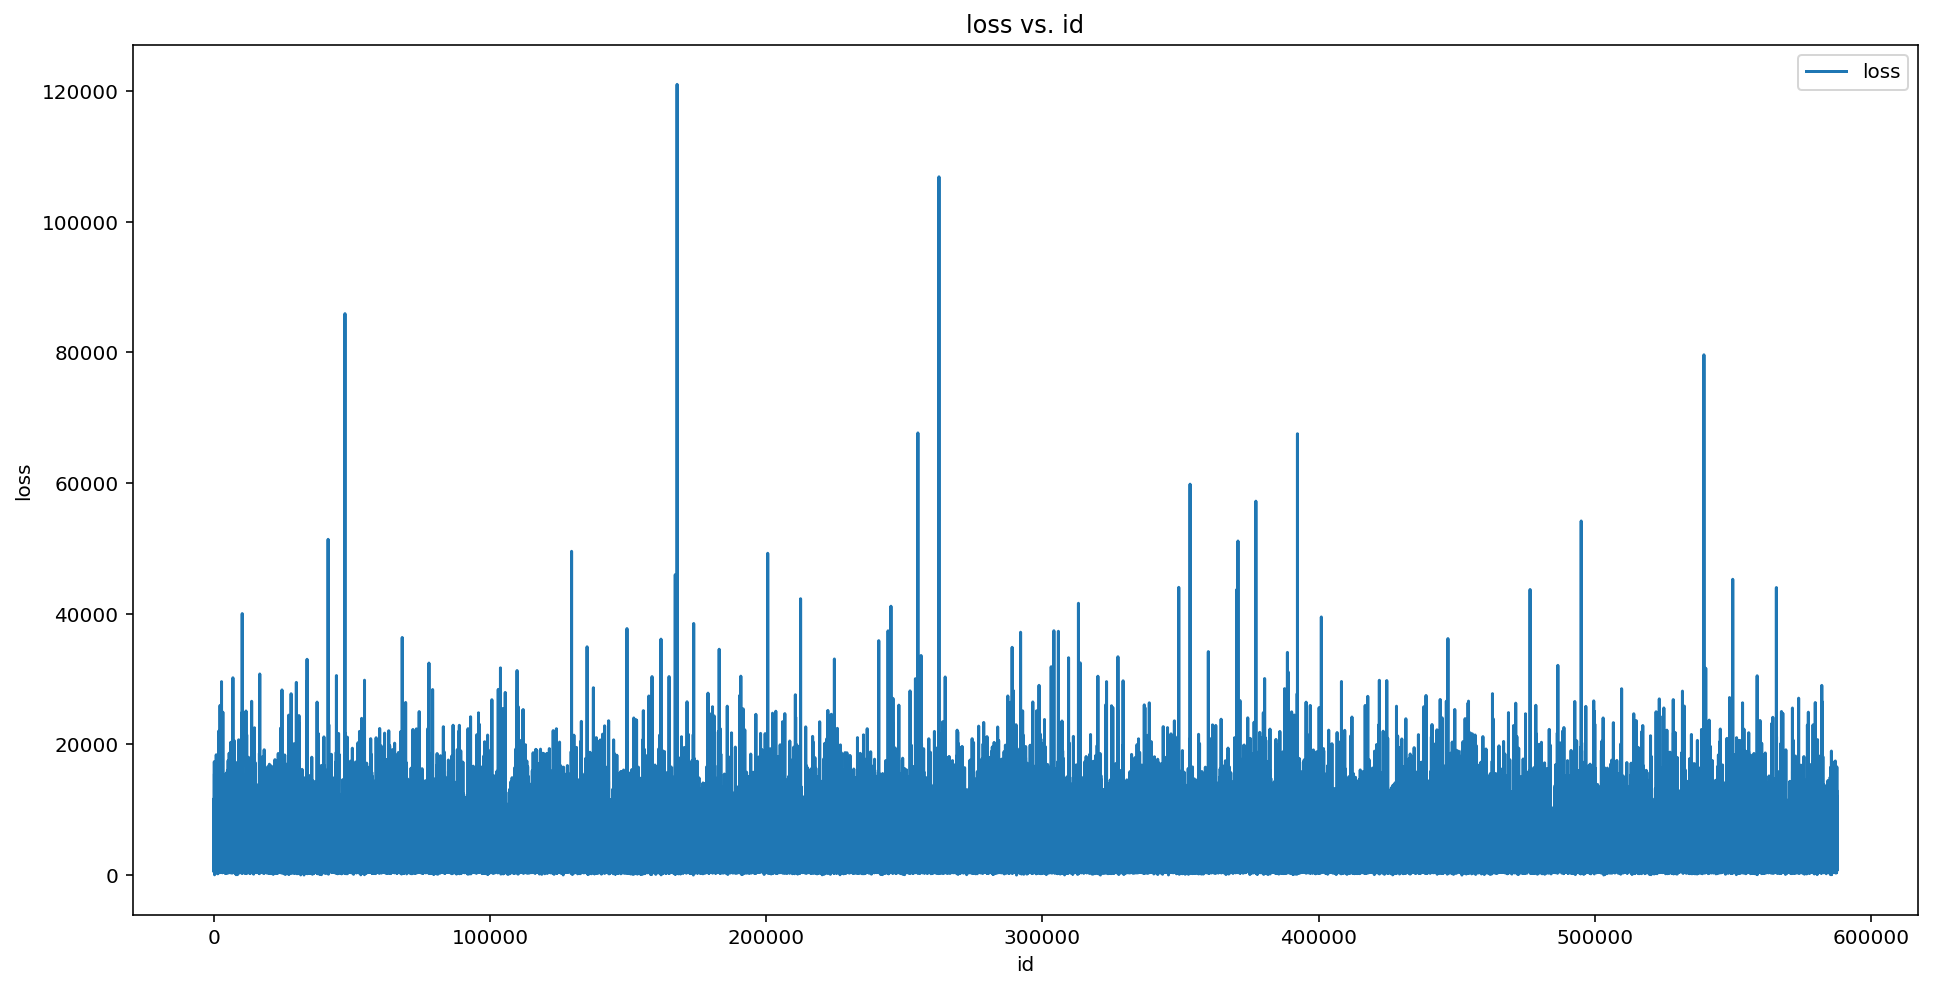

In [112]:
plt.figure(figsize=(16,8))
plt.plot(train['id'], train['loss'])
plt.title('loss vs. id')
plt.xlabel('id')
plt.ylabel('loss')
plt.legend()
plt.show()

In [113]:
from scipy import stats

stats.mstats.skew(train['loss']).data

array(3.79492815)

<function matplotlib.pyplot.show(*args, **kw)>

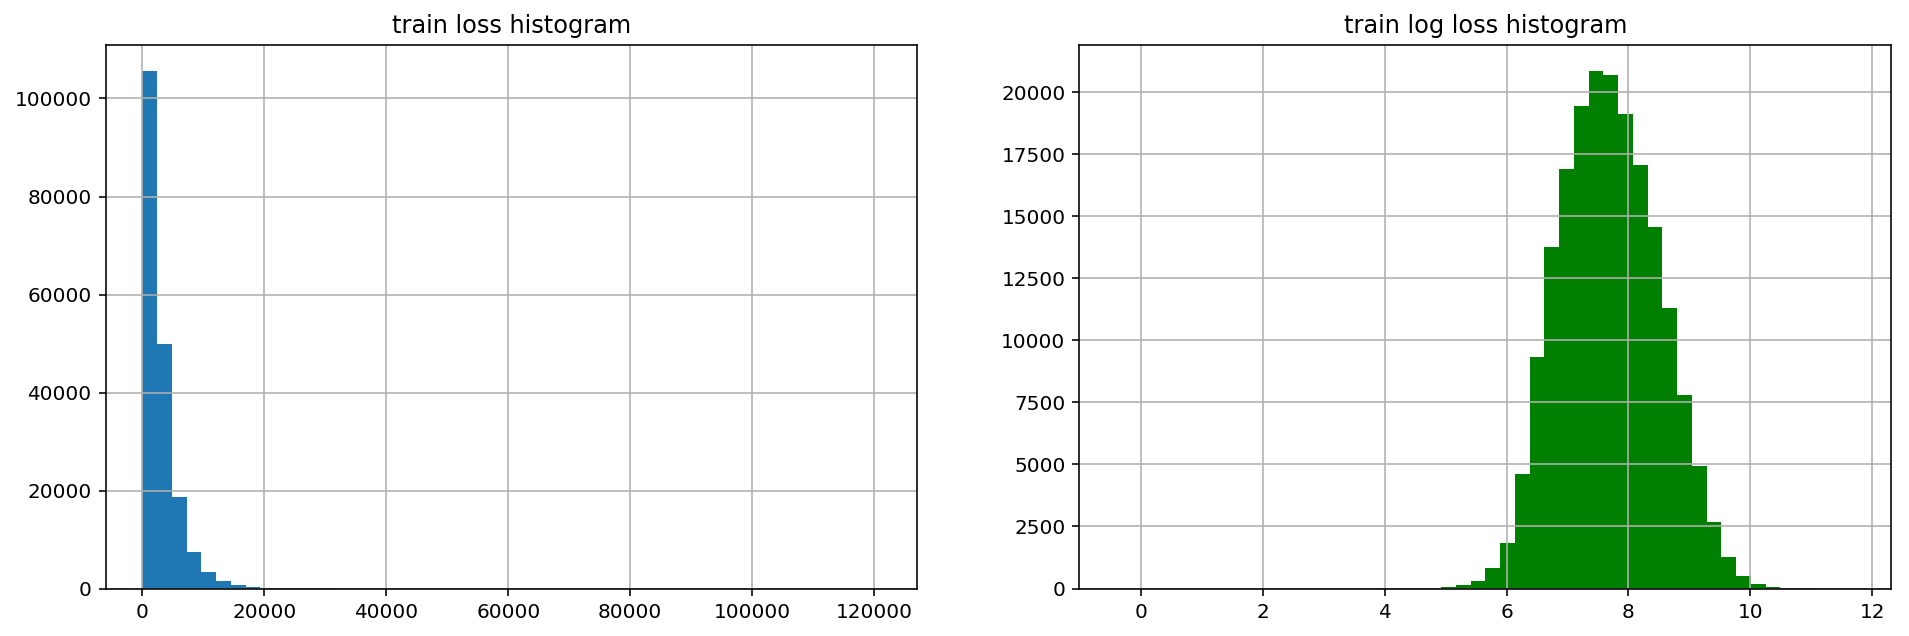

In [114]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(train['loss'],bins=50)
ax1.grid(True)
ax1.set_title('train loss histogram')
ax2.hist(np.log(train['loss']),bins=50,color='g')
ax2.set_title('train log loss histogram')
ax2.grid(True)
plt.show

# comparing the train and test dataset distribution


In order to get reliable predictions on test set, we need to make sure that the test data is distributed the same way as the training data does. If we do confirm that the data is equally distributed, this allows us to cross-validate on training set as well as

One way is to arrange a statistical test. A good option is Welch's t-test: it is used to test the hypothesis that two distributions have equal means and works well when two samples have unequal variances and sample sizes.

A downside of this approach is that we have to test features one by one.

On the other hand, we may use ML algorithms to see whether there's a significant different between train and test. We use the method described as Adversarial validation.

The idea is to mix training and test sets and to see if a classifier (a logistic regression or a decision tree) can separate one from the other.

In [115]:
from copy import deepcopy

train_d = train.drop(['id','loss'], axis = 1)
test_d = test.drop(['id'], axis = 1)
# distinguish train and test
train_d['Target'] = 1
test_d['Target'] = 0
# concatenate train and test
data = pd.concat((train_d, test_d))
# use label encoding for categorical features
data_le = deepcopy(data)
for c in range(len(cat_features)):
    data_le[cat_features[c]] = data_le[cat_features[c]].astype('category').cat.codes
    
# use one-hot encoding for categorical features
data = pd.get_dummies(data=data, columns=cat_features)

In [116]:
data = data.iloc[np.random.permutation(len(data))]
data.reset_index(drop=True, inplace=True)

x = data.drop(['Target'], axis=1)
y = data.Target

train_examples = 100000

x_train = x[:train_examples]
x_test = x[train_examples:]
y_train = y[:train_examples]
y_test = y[train_examples:]

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.cross_validation import cross_val_score

# logistic regression
clf = LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict_proba(x_test)[:,1]
auc = AUC(y_test, pred)
print('Logistic Regression AUC: {:.2%}'.format(auc))

# random forest, 100 trees trained in parallel
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(x_train, y_train)
pred = clf.predict_proba(x_test)[:,1]
auc = AUC(y_test, pred)
print('Random Forest AUC: {:.2%}'.format(auc))

# CV the results, 2-fold CV
scores = cross_val_score(LogisticRegression(), x, y, scoring='roc_auc', cv=2)
print ('mean AUC: {:.2%}, std: {:.2%} \n'.format(scores.mean(), scores.std())  )


Logistic Regression AUC: 50.15%
Random Forest AUC: 49.88%
mean AUC: 50.15%, std: 0.03% 



In [118]:
# shuffle train and test
data_le = data_le.iloc[np.random.permutation(len(data_le))]

In [119]:
# run PCA transformation

from sklearn.decomposition import PCA

X = data_le.iloc[:, :130]
y = data_le.iloc[:, 130:]

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

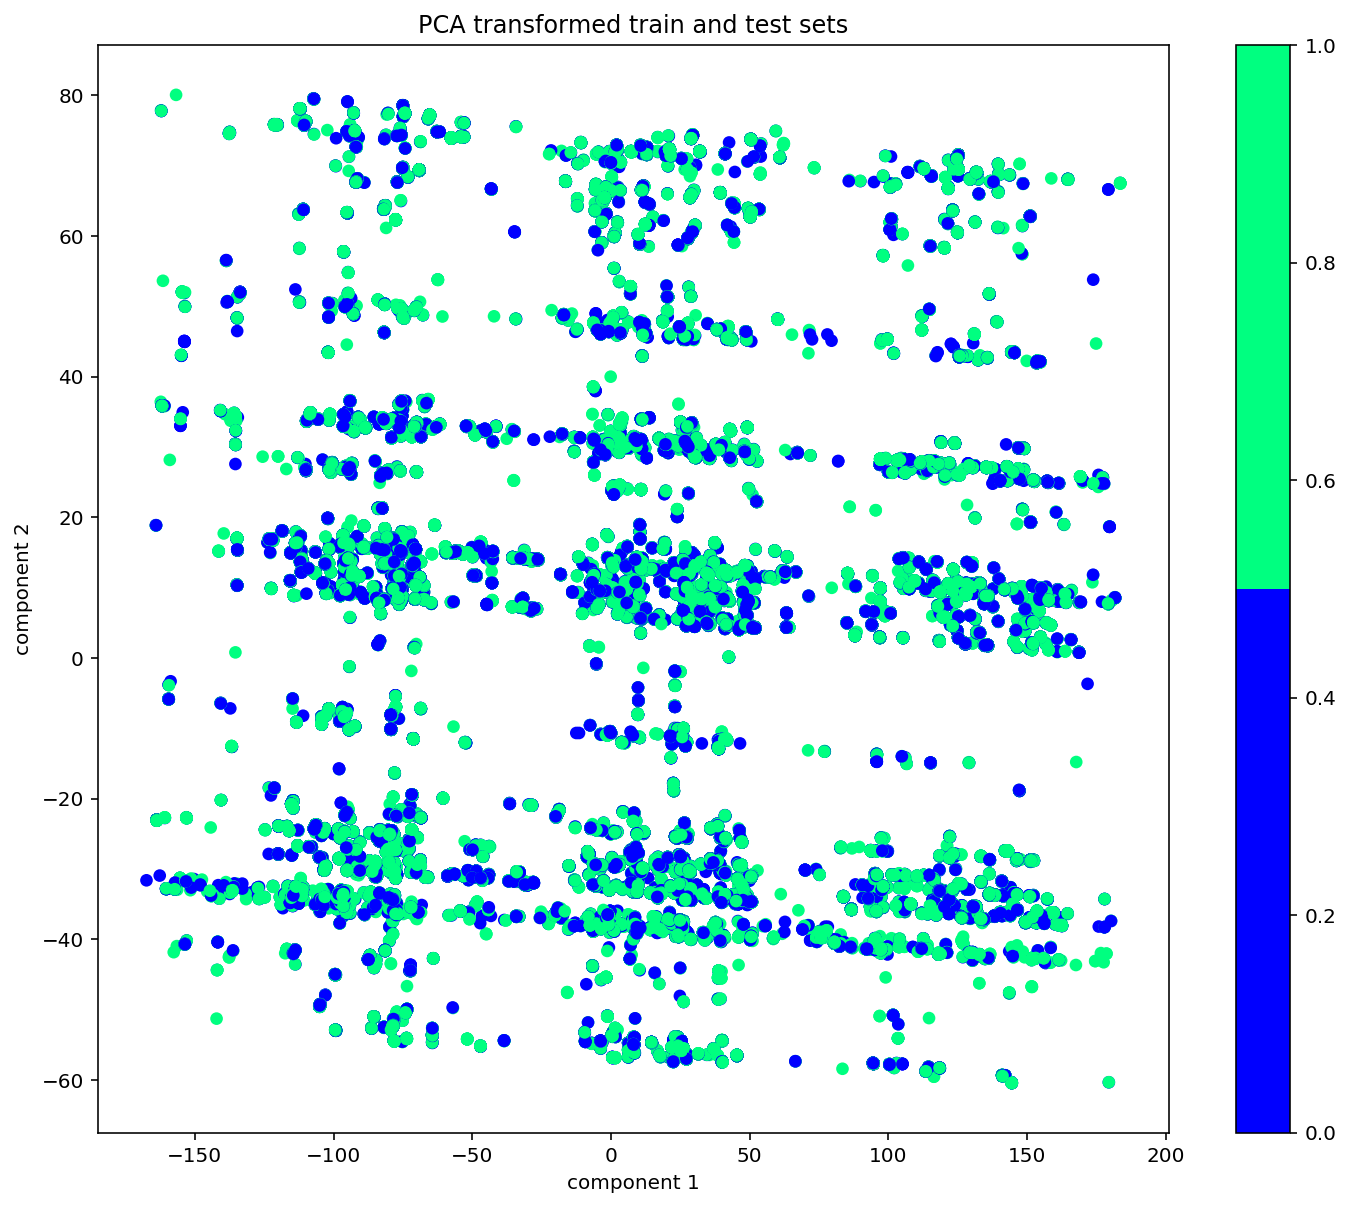

In [120]:
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.array(y["Target"]), edgecolor='none', s=40,
           cmap=plt.cm.get_cmap('winter', 2))
plt.title('PCA transformed train and test sets')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()